<a href="https://www.kaggle.com/code/vpotereyko/hw-nn2-fruits-ds?scriptVersionId=298337510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

# Подивимось на структуру папок датасету
data_path = "/kaggle/input"

for dirname, _, filenames in os.walk(data_path):
    # Показуємо тільки назви папок (класи), не всі файли
    level = dirname.replace(data_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(dirname)}/')
    if level >= 2:  # не заглиблюємось далі 2 рівнів
        continue

input/
  datasets/
    sshikamaru/
      fruit-recognition/
        test/
          test/
        train/
          train/
            Orange/
            Tomato/
            Passion Fruit/
            Cucumber Ripe/
            Cactus fruit/
            Pomegranate/
            Plum/
            Pineapple/
            Papaya/
            Potato Red/
            Kiwi/
            Limes/
            Apple Braeburn/
            Pear/
            Onion White/
            Strawberry/
            Grape Blue/
            Blueberry/
            Apple Granny Smith/
            Apricot/
            Pepper Red/
            Clementine/
            Lemon/
            Avocado/
            Raspberry/
            Cantaloupe/
            Peach/
            Corn/
            Banana/
            Cherry/
            Pepper Green/
            Watermelon/
            Mango/


In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

In [3]:
# Трансформації для тренувальних даних (з аугментацією)
# Посилання: https://pytorch.org/vision/stable/transforms.html
# Навіщо це потрібно: нейромережа вчиться краще, коли бачить більше різноманітних прикладів.
# Без аугментації вона може "завчити" конкретні фото замість того,
# щоб зрозуміти загальні ознаки фрукта.
# Аугментація — це коли ти штучно "розмножуєш" свої фотографії, трохи змінюючи кожну.
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Змінюємо розмір до 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Випадковий горизонтальний переворот
    transforms.RandomRotation(10),           # Випадковий поворот до 10 градусів
    transforms.ToTensor(),                   # Конвертуємо в тензор [0, 1]
])

# Трансформації для тестових даних (без аугментації)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),           # Тільки змінюємо розмір
    transforms.ToTensor(),                   # Конвертуємо в тензор
])

In [4]:
# Шлях до даних 
# Cтруктура у Блоку 1
train_path = "/kaggle/input/datasets/sshikamaru/fruit-recognition/train/train"
test_path = "/kaggle/input/datasets/sshikamaru/fruit-recognition/test"

# Створюємо датасети з відповідними трансформаціями
train_dataset = datasets.ImageFolder(train_path, transform=train_transform)
test_dataset = datasets.ImageFolder(test_path, transform=test_transform)

print(f"Кількість тренувальних зразків: {len(train_dataset)}")
print(f"Кількість тестових зразків: {len(test_dataset)}")

Кількість тренувальних зразків: 16854
Кількість тестових зразків: 5641


In [5]:
# Назви класів (фруктів)
print(f"Кількість класів: {len(train_dataset.classes)}")
print(f"Класи: {train_dataset.classes}")
print(f"\nclass_to_idx: {train_dataset.class_to_idx}")

Кількість класів: 33
Класи: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

class_to_idx: {'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [6]:
# Подивимось на перший зразок
img, label = train_dataset[0]
print(f"Тип: {type(img)}")
print(f"Форма тензора: {img.shape}")  # [C, H, W] = [3, 224, 224]
print(f"Мітка (індекс): {label}")
print(f"Назва класу: {train_dataset.classes[label]}")

# Перший зразок з кожного класу (до 5 класів)
shown_classes = set()
for i in range(len(train_dataset)):
    img, label = train_dataset[i]
    if label not in shown_classes:
        print(f"Зразок [{i}]: форма {img.shape}, мітка: {label} → {train_dataset.classes[label]}")
        shown_classes.add(label)
    if len(shown_classes) >= 5:
        break

Тип: <class 'torch.Tensor'>
Форма тензора: torch.Size([3, 224, 224])
Мітка (індекс): 0
Назва класу: Apple Braeburn
Зразок [0]: форма torch.Size([3, 224, 224]), мітка: 0 → Apple Braeburn
Зразок [492]: форма torch.Size([3, 224, 224]), мітка: 1 → Apple Granny Smith
Зразок [984]: форма torch.Size([3, 224, 224]), мітка: 2 → Apricot
Зразок [1476]: форма torch.Size([3, 224, 224]), мітка: 3 → Avocado
Зразок [1903]: форма torch.Size([3, 224, 224]), мітка: 4 → Banana


In [7]:
# Розмір батчу
batch_size = 32

# Створюємо DataLoader для тренувальних та тестових даних
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Перевірка
for images, labels in train_loader:
    print(f"Форма батчу зображень: {images.shape}")  # [batch_size, 3, 224, 224]
    print(f"Форма батчу міток: {labels.shape}")       # [batch_size]
    break  # Виводимо тільки перший батч

Форма батчу зображень: torch.Size([32, 3, 224, 224])
Форма батчу міток: torch.Size([32])


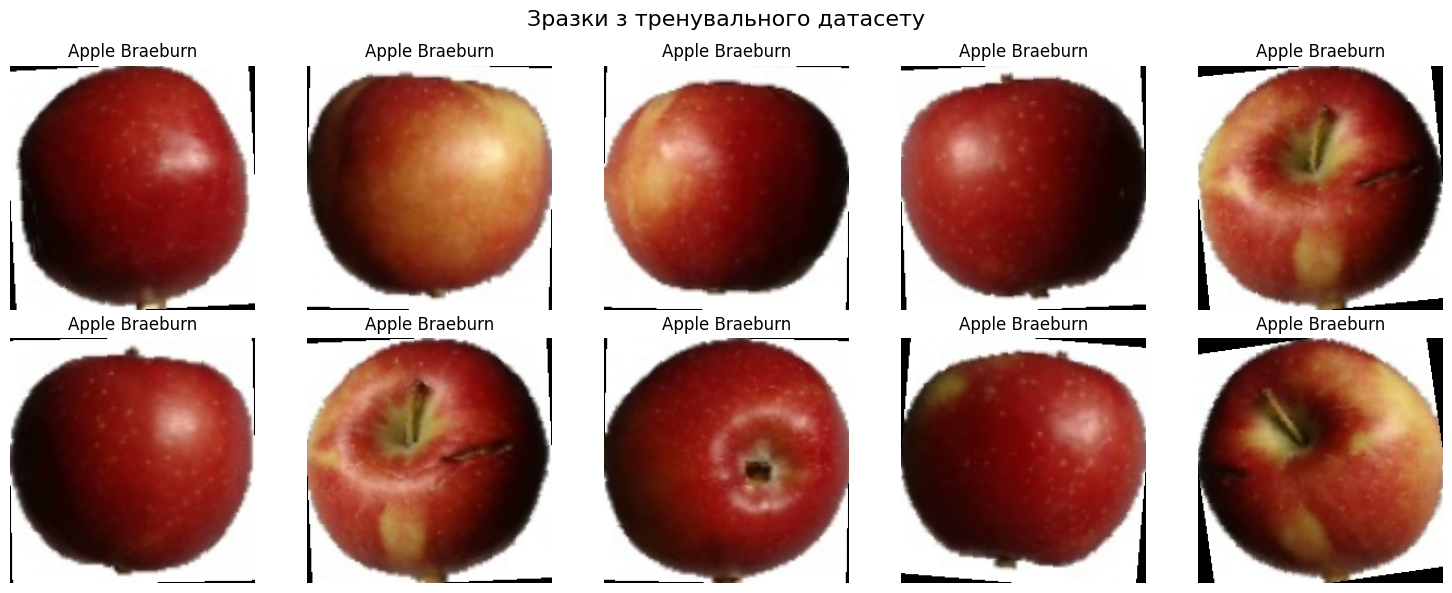

In [8]:
# Візуалізація кількох зразків з тренувального набору
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    # Конвертуємо тензор [C, H, W] → [H, W, C] для matplotlib
    img_np = img.permute(1, 2, 0).numpy()
    ax.imshow(img_np)
    ax.set_title(train_dataset.classes[label])
    ax.axis('off')

plt.suptitle("Зразки з тренувального датасету", fontsize=16)
plt.tight_layout()
plt.show()

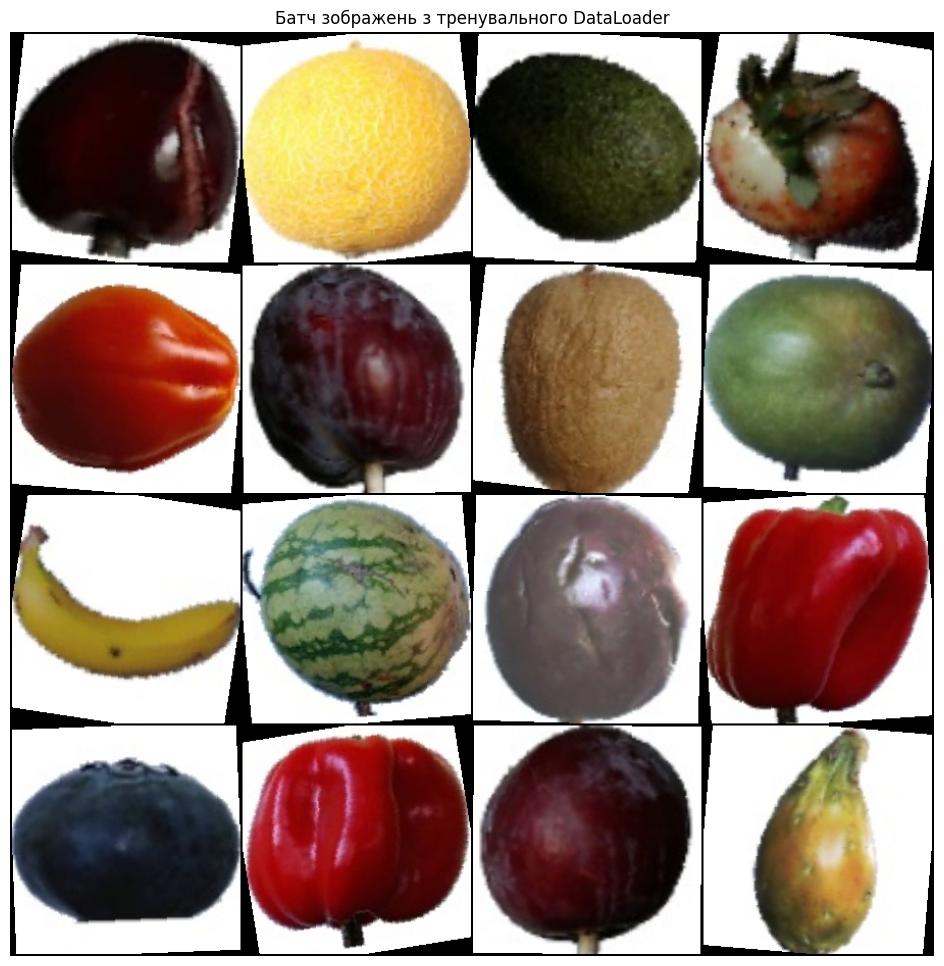

Мітки: ['Cherry', 'Cantaloupe', 'Avocado', 'Strawberry', 'Tomato', 'Plum', 'Kiwi', 'Mango', 'Banana', 'Watermelon', 'Passion Fruit', 'Pepper Red', 'Blueberry', 'Pepper Red', 'Plum', 'Cactus fruit']


In [9]:
# Отримуємо один батч
images, labels = next(iter(train_loader))

# Створюємо сітку зображень
grid = make_grid(images[:16], nrow=4, padding=2)

# Відображаємо
plt.figure(figsize=(12, 12))
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.title("Батч зображень з тренувального DataLoader")
plt.axis('off')
plt.show()

# Виводимо мітки
print("Мітки:", [train_dataset.classes[l] for l in labels[:16].tolist()])